In [3]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv("./data_1k_embeddings.csv")
data

,title,description,instructor_rating,prompt,ada_embedding
0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",4.263158,"course name ""Spiritual But Not Religious"": Spi...","[-0.026220794767141342, 0.043113525956869125, ..."
1,1492 and the Aftermath,Examines Spanish attempts to understand and fi...,4.333333,course name 1492 and the Aftermath (Examines S...,"[-0.013932260684669018, 0.018610527738928795, ..."
2,17th Century Philosophy,Studies the central philosophers in the ration...,4.750000,course name 17th Century Philosophy (Studies t...,"[-0.026763299480080605, 0.0338415801525116, 0...."
3,18th Century Philosophy,Studies the central philosophers in the empiri...,3.600000,course name 18th Century Philosophy (Studies t...,"[-0.014998062513768673, 0.03517909348011017, 0..."
4,A Buddhist Approach to Development,Buddhism takes an ethical and practical view o...,5.000000,course name A Buddhist Approach to Development...,"[-0.032736778259277344, 0.020574472844600677, ..."
...,...,...,...,...,...
2386,Writing and Critical Inquiry: Community Engage...,Requires off-grounds work with local non-profi...,4.750000,course name Writing and Critical Inquiry: Comm...,"[0.022321652621030807, 0.039959684014320374, 0..."
2387,Writing with Sound,"This course trains students to become attuned,...",5.000000,course name Writing with Sound (This course tr...,"[0.01297737006098032, 0.06615013629198074, 0.0..."
2388,Writing with Style,Develops an understanding of the wide range of...,5.000000,course name Writing with Style (Develops an un...,"[-0.002481496427208185, 0.03429679200053215, -..."
2389,Young Adult Literature,"Using Sims Bishops' (1990) mirrors, windows, a...",5.000000,course name Young Adult Literature (Using Sims...,"[-0.0199494119733572, 0.0700596272945404, 0.01..."


In [8]:
X = np.array(data['ada_embedding'].apply(eval).to_list(), dtype=np.float32)
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results = tsne.fit_transform(X)

In [10]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
# df_tsne['Class Name'] = data['Class Name'] # Add labels column from df_train to df_tsne
df_tsne['data_tsne'] = data['title']
df_tsne

,TSNE1,TSNE2,data_tsne
0,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in..."
1,-46.033535,17.825169,1492 and the Aftermath
2,-25.262386,-31.668848,17th Century Philosophy
3,-25.241011,-31.697111,18th Century Philosophy
4,-25.334429,-12.603502,A Buddhist Approach to Development
...,...,...,...
2386,-52.716881,-17.671898,Writing and Critical Inquiry: Community Engage...
2387,1.780741,48.134121,Writing with Sound
2388,-58.559212,-17.487988,Writing with Style
2389,-0.313575,-22.895670,Young Adult Literature


In [22]:
# loading the data
orig = pd.read_csv("./data.csv")
merged_df = df_tsne.merge(orig, left_on="data_tsne", right_on="title", how="left")
merged_df

/var/folders/m0/sl2yvpv551gcfbk3gdntf74r0000gn/T/ipykernel_12944/1235606350.py:2: DtypeWarning: Columns (14,15,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  orig = pd.read_csv("./data.csv")


,TSNE1,TSNE2,data_tsne,course_id,title,description,course_number,average,a_plus,a,...,amount_writing,amount_group,amount_homework,review_created,year,season,instructor_email,instructor_name,year_last_taught,season_last_taught
0,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in...",10532.0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",2660.0,3.563887,5.0,450.0,...,1.0,0,0.0,2013-10-30 23:28:18+00:00,2013,SPRING,msh6q@virginia.edu,Matthew Hedstrom,2024.0,SPRING
1,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in...",10532.0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",2660.0,3.563887,5.0,450.0,...,0.0,0,0.0,2013-12-26 13:15:45+00:00,2013,SPRING,msh6q@virginia.edu,Matthew Hedstrom,2024.0,SPRING
2,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in...",10532.0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",2660.0,3.563887,5.0,450.0,...,1.0,0,0.0,2015-04-13 20:39:07+00:00,2015,SPRING,msh6q@virginia.edu,Matthew Hedstrom,2024.0,SPRING
3,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in...",10532.0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",2660.0,3.563887,5.0,450.0,...,2.0,0,0.0,2015-04-30 18:04:22+00:00,2015,SPRING,msh6q@virginia.edu,Matthew Hedstrom,2024.0,SPRING
4,-33.714764,-24.560392,"""Spiritual But Not Religious"": Spirituality in...",10532.0,"""Spiritual But Not Religious"": Spirituality in...","This course asks: what does ""spiritual but not...",2660.0,3.563887,5.0,450.0,...,0.0,0,0.0,2015-05-06 19:12:54+00:00,2015,SPRING,msh6q@virginia.edu,Matthew Hedstrom,2024.0,SPRING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46841,-27.852238,-12.044436,Zen,7086.0,Zen,Studies the development and history of the tho...,2450.0,3.283625,5.0,74.0,...,0.0,0,0.0,2011-01-10 00:00:00+00:00,2010,FALL,psg3w@virginia.edu,Paul Groner,2023.0,JANUARY
46842,-27.852238,-12.044436,Zen,7086.0,Zen,Studies the development and history of the tho...,2450.0,3.283625,5.0,74.0,...,0.0,0,0.0,2011-10-23 00:00:00+00:00,2011,FALL,psg3w@virginia.edu,Paul Groner,2023.0,JANUARY
46843,-27.852238,-12.044436,Zen,7086.0,Zen,Studies the development and history of the tho...,2450.0,3.283625,5.0,74.0,...,0.0,0,0.0,2011-11-08 00:00:00+00:00,2011,FALL,psg3w@virginia.edu,Paul Groner,2023.0,JANUARY
46844,-27.852238,-12.044436,Zen,7086.0,Zen,Studies the development and history of the tho...,2450.0,3.283625,5.0,74.0,...,0.0,0,0.0,2011-11-15 00:00:00+00:00,2011,FALL,psg3w@virginia.edu,Paul Groner,2023.0,JANUARY


(-30.00632266998291, 67.80796222686767, -39.40408344268799, 39.77927036285401)

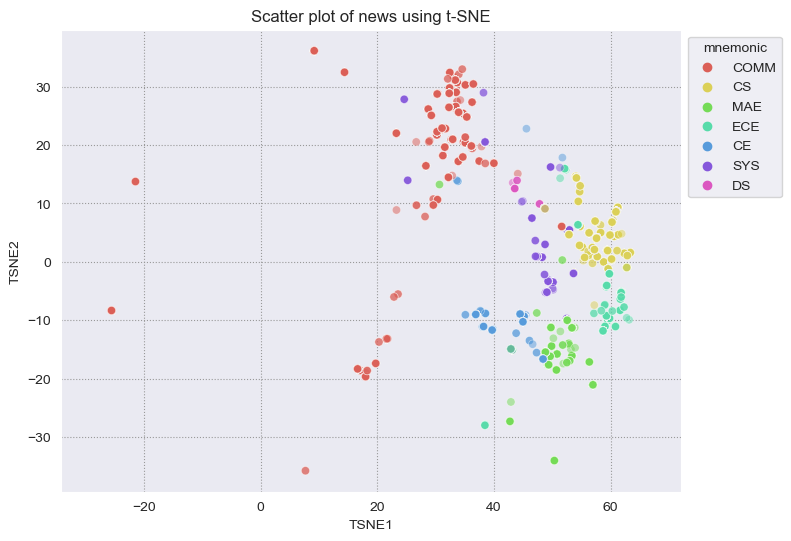

In [39]:
key_points_of_interest = ["CS", "DS", "COMM", "ECE", "MAE", "CE", "SYS"]

filtered_df = merged_df[merged_df["mnemonic"].isin(key_points_of_interest)]
# filtered_df = merged_df

fig, ax = plt.subplots(figsize=(8, 6))  # Set figsize
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(
    data=filtered_df, x="TSNE1", y="TSNE2", hue="mnemonic", palette="hls", alpha=0.5
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of news using t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.axis("equal")